<a href="https://colab.research.google.com/github/Kartavya-Jharwal/Kartavya_Business_Analytics2025/blob/main/Class_Assignments/week5/Week_5_Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are analyzing the impact of product placement on monthly sales performance. Specifically, you are comparing the sales of a product displayed in two different store locations:

Special Up-Front Display

In-Aisle Placement
## Hypothesis Formulation
Null Hypothesis (H₀): There is no significant difference in monthly sales between the special up-front display and the in-aisle placement.

Alternative Hypothesis (H₁): There is a significant difference in monthly sales between the special up-front display and the in-aisle placement.

Significance level of 0.05 (Confidence level of 95%)
Independent T Test


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Construct the raw GitHub URLs
url_independent = "https://raw.githubusercontent.com/Kartavya-Jharwal/Kartavya_Business_Analytics2025/main/Class_Assignments/week5/Week%205%20session%201%20Independent%20t%20test%20example.xlsx"
url_paired = "https://raw.githubusercontent.com/Kartavya-Jharwal/Kartavya_Business_Analytics2025/main/Class_Assignments/week5/Week%205%20Session%201%20Paired%20T%20test%20Example.xlsx"

# Load the data into pandas DataFrames directly from the URLs
df_independent = pd.read_excel(url_independent)
df_paired = pd.read_excel(url_paired)


In [7]:
# Display shape, head, describe, and info for df_independent
print("Shape of df_independent:")
display(df_independent.shape)

print("\nHead of df_independent:")
display(df_independent.head())

print("\nDescription of df_independent:")
display(df_independent.describe())

print("\nInfo of df_independent:")
display(df_independent.info())

Shape of df_independent:


(10, 2)


Head of df_independent:


,Special Front,In-Aisle
0,224,192
1,189,236
2,248,164
3,285,154
4,273,189



Description of df_independent:


,Special Front,In-Aisle
count,10.000000,10.000000
mean,246.400000,202.300000
std,42.542005,32.527083
min,189.000000,154.000000
25%,217.250000,186.750000
50%,245.500000,197.000000
75%,278.250000,219.750000
max,317.000000,261.000000



Info of df_independent:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Special Front  10 non-null     int64
 1   In-Aisle       10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


None

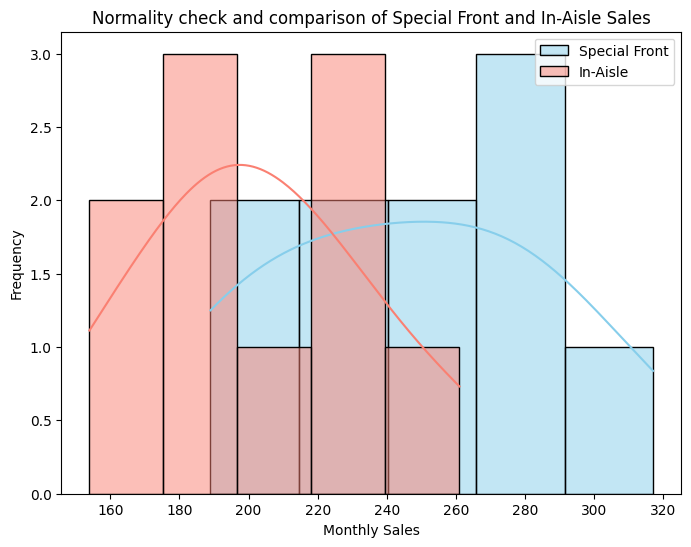


Shapiro-Wilk test results:
Special Front: Statistic=0.9568, P-value=0.7486
In-Aisle: Statistic=0.9769, P-value=0.9462

Interpretation:
Special Front: Data is likely normally distributed (Fail to reject H0)
In-Aisle: Data is likely normally distributed (Fail to reject H0)


In [9]:
# Normality check with seaborn plots
plt.figure(figsize=(8, 6))

sns.histplot(data=df_independent, x='Special Front', kde=True, color='skyblue', label='Special Front')
sns.histplot(data=df_independent, x='In-Aisle', kde=True, color='salmon', label='In-Aisle')

plt.title('Normality check and comparison of Special Front and In-Aisle Sales')
plt.xlabel('Monthly Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Shapiro-Wilk test for normality
shapiro_special_front = stats.shapiro(df_independent['Special Front'])
shapiro_in_aisle = stats.shapiro(df_independent['In-Aisle'])

print("\nShapiro-Wilk test results:")
print(f"Special Front: Statistic={shapiro_special_front.statistic:.4f}, P-value={shapiro_special_front.pvalue:.4f}")
print(f"In-Aisle: Statistic={shapiro_in_aisle.statistic:.4f}, P-value={shapiro_in_aisle.pvalue:.4f}")

# Interpret the Shapiro-Wilk test results
alpha = 0.05
print("\nInterpretation:")
if shapiro_special_front.pvalue < alpha:
    print("Special Front: Data is likely not normally distributed (Reject H0)")
else:
    print("Special Front: Data is likely normally distributed (Fail to reject H0)")

if shapiro_in_aisle.pvalue < alpha:
    print("In-Aisle: Data is likely normally distributed (Fail to reject H0)")
else:
    print("In-Aisle: Data is likely normally distributed (Fail to reject H0)")

In [4]:
# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(df_independent['Special Front'], df_independent['In-Aisle'])

# Print the results
print(f"Independent t-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nResult: Reject the null hypothesis.")
    print("Conclusion: There is a significant difference in monthly sales between the special up-front display and the in-aisle placement.")
else:
    print("\nResult: Fail to reject the null hypothesis.")
    print("Conclusion: There is no significant difference in monthly sales between the special up-front display and the in-aisle placement.")

Independent t-test results:
T-statistic: 2.604123851375045
P-value: 0.01794309835110639

Result: Reject the null hypothesis.
Conclusion: There is a significant difference in monthly sales between the special up-front display and the in-aisle placement.


Based on the independent t-test results (P-value: 0.0179), which is less than the significance level of 0.05, we reject the null hypothesis. This indicates there is a statistically significant difference in monthly sales between the special up-front display and the in-aisle placement.

This confirms that where you place a product can materially affect how much you sell. If up-front displays consistently outperform, a small business can boost sales simply by rethinking shelf strategy

# Paired T Test
A researcher wants to determine if there is any difference between the mean price at Costco and Walmart of a market basket containing n = 7 different items.

Null hypothesis H0: There is no difference in monthly sales between the special up-front display and the in-aisle placement.

Alternative hypothesis H1 (two-sided): There is a difference in monthly sales between the special up-front display and the in-aisle placement.

Primary Significance Level: α = 0.05

In [10]:
# Display shape, head, describe, and info for df_paired
print("Shape of df_paired:")
display(df_paired.shape)

print("\nHead of df_paired:")
display(df_paired.head())

print("\nDescription of df_paired:")
display(df_paired.describe())

print("\nInfo of df_paired:")
display(df_paired.info())

Shape of df_paired:


(7, 3)


Head of df_paired:


,Item,Costco,Walmart
0,Chicken Broth,5.98,5.88
1,Ice Cream,8.59,7.19
2,Dishwasher Detergent,9.00,17.00
3,Laundry Detergent,11.00,12.00
4,Paper Towels,1.47,2.09



Description of df_paired:


,Costco,Walmart
count,7.000000,7.000000
mean,7.038571,10.325714
std,4.328816,9.197376
min,1.230000,1.120000
25%,3.725000,3.985000
50%,8.590000,7.190000
75%,10.000000,14.500000
max,12.000000,27.000000



Info of df_paired:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Item     7 non-null      object 
 1   Costco   7 non-null      float64
 2   Walmart  7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 300.0+ bytes


None

## Paired data normality check

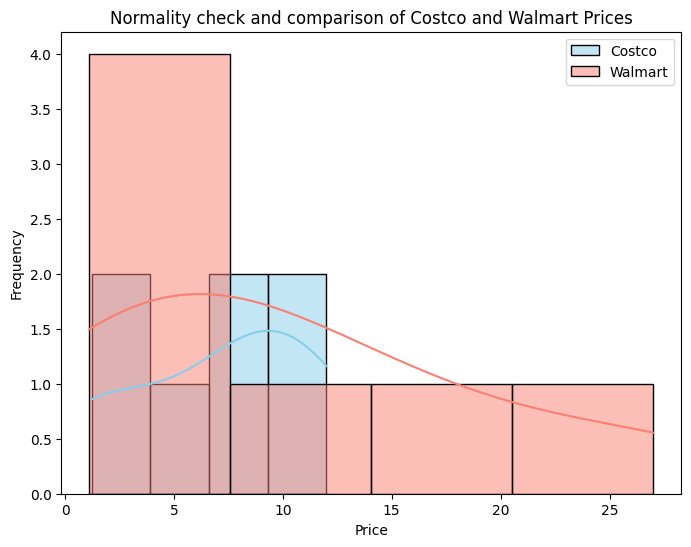


Shapiro-Wilk test results:
Costco: Statistic=0.8939, P-value=0.2954
Walmart: Statistic=0.9114, P-value=0.4057

Interpretation:
Costco: Data is likely normally distributed (Fail to reject H0)
Walmart: Data is likely normally distributed (Fail to reject H0)


In [11]:
# Normality check with seaborn plots
plt.figure(figsize=(8, 6))

sns.histplot(data=df_paired, x='Costco', kde=True, color='skyblue', label='Costco')
sns.histplot(data=df_paired, x='Walmart', kde=True, color='salmon', label='Walmart')

plt.title('Normality check and comparison of Costco and Walmart Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Shapiro-Wilk test for normality
shapiro_costco = stats.shapiro(df_paired['Costco'])
shapiro_walmart = stats.shapiro(df_paired['Walmart'])

print("\nShapiro-Wilk test results:")
print(f"Costco: Statistic={shapiro_costco.statistic:.4f}, P-value={shapiro_costco.pvalue:.4f}")
print(f"Walmart: Statistic={shapiro_walmart.statistic:.4f}, P-value={shapiro_walmart.pvalue:.4f}")

# Interpret the Shapiro-Wilk test results
alpha = 0.05
print("\nInterpretation:")
if shapiro_costco.pvalue < alpha:
    print("Costco: Data is likely not normally distributed (Reject H0)")
else:
    print("Costco: Data is likely normally distributed (Fail to reject H0)")

if shapiro_walmart.pvalue < alpha:
    print("Walmart: Data is likely not normally distributed (Reject H0)")
else:
    print("Walmart: Data is likely normally distributed (Fail to reject H0)")

## Paired t-test



In [12]:
# Perform paired samples t-test
t_statistic_paired, p_value_paired = stats.ttest_rel(df_paired['Costco'], df_paired['Walmart'])

# Print the results
print(f"Paired t-test results:")
print(f"T-statistic: {t_statistic_paired}")
print(f"P-value: {p_value_paired}")

# Interpret the results
alpha = 0.05
if p_value_paired < alpha:
    print("\nResult: Reject the null hypothesis.")
    print("Conclusion: There is a significant difference in the mean price between Costco and Walmart for the market basket items.")
else:
    print("\nResult: Fail to reject the null hypothesis.")
    print("Conclusion: There is no significant difference in the mean price between Costco and Walmart for the market basket items.")

Paired t-test results:
T-statistic: -1.4470527628170282
P-value: 0.19803202683637366

Result: Fail to reject the null hypothesis.
Conclusion: There is no significant difference in the mean price between Costco and Walmart for the market basket items.


## Summary:

*   Both 'Costco' and 'Walmart' price data appear to be approximately normally distributed based on visual inspection of histograms and confirmed by Shapiro-Wilk tests with p-values of 0.2954 for Costco and 0.4057 for Walmart (both > 0.05).
*   A paired samples t-test comparing the mean prices between Costco and Walmart resulted in a t-statistic of -1.447 and a p-value of 0.198.
*   Based on the paired t-test, with a p-value of 0.198 being greater than the significance level of 0.05, there is no statistically significant difference in the mean price between Costco and Walmart for the market basket items in this sample.

### Insights or Next Steps

*   While the sample size is small (n=7), the current data does not provide sufficient evidence to conclude that there is a price difference between Costco and Walmart for these specific items.
*   To gain more confidence in the findings, it would be beneficial to collect a larger sample of market basket items and compare their prices between the two retailers.
